# Actividad - Proyecto práctico



*   Alumno 1: Unai Marín Etxebarria
*   Alumno 2: Marta Castillo Galán
*   Alumno 3: Raúl Murillo Gallego
*   Alumno 4: Laura Molinos Mayo

Enlace GitHub:

https://github.com/RaulMGallego/08MIAR_10_B_2024-25_Aprendizaje_por_refuerzo







---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/Colab Notebooks"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/Colab Notebooks  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks
Archivos en el directorio: 
['Copia de Te damos la bienvenida a Colaboratory', 'Aprendizaje_supervisado_tema1_terminologia.ipynb', 'dqn_SpaceInvaders-v0_log.json', 'Copia de Proyecto_práctico(1).ipynb']


---
### 1.4. Instalar librerías necesarias

In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.1
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-zn9l1yyv
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-zn9l1yyv
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done
  Created wheel for atari-py: filename=atari_py-1.2.2-cp311-cp311-linux_x86_64.whl size=4738554 sha256=c1d136225f56acc6d6ba035448df35cf6d0f47bd9cddb5d1ee819eee5e5802f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-f2chhayt/wheels/1a/58/b3/3baab9d1509939ecce2dfd9ca349c222b7ee6590f4bd6097a1
Successfully built atari-py
  Using cached keras_rl2-1.0.5-py3-none-any.whl.metadata (304 bytes)
Using cached keras_rl2-1.0.5-py3-none-any.whl (52 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s 

#### Importar librerías

La tarea que tenemos por delante es exigente en varios frentes. Por un lado, se trata de diseñar y entrenar un agente inteligente que, mediante Deep Q-Learning (DQN), sea capaz de alcanzar un rendimiento competitivo en un entorno tan desafiante como Space Invaders. Este objetivo implica llevar a la práctica conceptos teóricos complejos, algunos ya trabajados durante el curso y otros que ha sido necesario investigar y comprender de forma autónoma. Nos detendremos más adelante en estas decisiones técnicas, donde cada parámetro elegido responde a un razonamiento y una necesidad específica.

Sin embargo, el reto no se limita a lo conceptual. Un segundo obstáculo, igualmente determinante, es el coste computacional del entrenamiento. Trabajar con modelos de aprendizaje profundo implica consumir recursos considerables, especialmente cuando se combinan redes convolucionales, técnicas de exploración-explotación y almacenamiento de experiencias. A lo largo del proyecto, este factor se convertirá en una limitación práctica constante: una red mal parametrizada puede suponer horas de entrenamiento desperdiciadas, con escaso retorno más allá del aprendizaje experimental. Minimizar ese tipo de errores se convierte, por tanto, en una prioridad operativa.

En este trabajo, uno de las cuatro integrantes ha trabajado con la GPU de Colab, mientras que los otros han realizado el desarrollo en local (uno de los cuales tiene GPU en su PC). Finalmente, esta memoria se ha escrito sobre el notebook definitivo, y contiene la ejecución del mismo al final.

A continuación, importamos los paquetes y librerías que serán de gran utilidad más adelante.

In [28]:
from __future__ import division

from PIL import Image
import numpy as np
import gym
from gym.wrappers import Monitor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K


from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

Nos disponemos ahora a configurar el entorno y los parámetros básicos que permitirán preparar adecuadamente los datos de entrada para nuestro agente DQN. En primer lugar, definimos una resolución estándar para las observaciones visuales, INPUT_SHAPE = (84, 84), y una ventana temporal de 4 fotogramas consecutivos (WINDOW_LENGTH = 4). Esta última elección viene respaldada por un concepto introducido en el curso, y es que la información contenida en una imagen estática es insuficiente para inferir dinámicas como la velocidad o dirección de los proyectiles. Por ello, en lugar de alimentarse de un único frame, el agente necesita una secuencia temporal que le permita observar el cambio entre estados. 

Asimismo, establecemos una semilla aleatoria fija para garantizar la reproducibilidad del experimento y así poder comparar distintas configuraciones sin que los resultados se vean distorsionados por el azar. Finalmente, extraemos el número de acciones posibles que el agente puede ejecutar en este entorno (nb_actions), el cual define la dimensión de salida de nuestra red neuronal. Estamos, por tanto, ante un problema con espacio de acciones finito y discreto, típico de los entornos tipo Atari, donde cada acción corresponde a un comando específico del juego, como moverse a izquierda, derecha o disparar.

In [29]:
# Hiperparametros del modelo
INPUT_SHAPE = (84, 84)        # Tamaño de la imagen de observación
WINDOW_LENGTH = 4             # Numero de observaciones tomadas como entrada

# Hiperparametros de la red
LEARNING_RATE = 0.00025

# Hiperparametros del agente
GAMMA = 0.99

TARGET_MODEL_UPDATE = 10_000   # Frecuencia con la que se actualiza el modelo objetivo
TRAIN_INTERVAL = 4             # determina cada cuántos pasos se entrena la red
DELTA_CLIP = 1.0               # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar
                               # fluctuaciones extremas.

In [30]:
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

# Usamos Monitor para grabar las partidas
env = Monitor(env, './video', force=True, video_callable=lambda episode_id: True)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [31]:
print("Numero de acciones disponibles: " + str(nb_actions))
print("\n")
print("Formato de las observaciones:")
env.observation_space

Numero de acciones disponibles: 6


Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

Las observaciones son imágenes RGB de 210x160 con valores de intensidad de pixel entre 0 y 255.

Podemos ver en la documentación que las acciones se corresponden con:

|Value|Meaning|Value|Meaning|Value|Meaning
|-----|-------|-----|-------|-----|-------|
|0|NOOP|1|FIRE|2|RIGHT|
|3|LEFT|4|RIGHTFIRE|5|LEFTFIRE|

#### Desarrollo de la solución

A continuación, definimos algunos de los componentes fundamentales tanto a nivel de arquitectura como conceptual dentro del marco del aprendizaje por refuerzo profundo. En concreto, establecemos el modo en que deben procesarse las observaciones, los lotes de estados y las recompensas antes de ser utilizados por el agente DQN.

En primer lugar, la función *process_observation* se encarga de transformar cada imagen observada del entorno: se redimensiona a 84×84 píxeles y se convierte a escala de grises para reducir la dimensionalidad del input y eliminar información no relevante. En segundo lugar, *process_state_batch* normaliza los valores de píxeles en los lotes de imágenes al rango [0, 1]; el objetivo de esto último es mejorar la estabilidad numérica del entrenamiento y acelerar la convergencia del modelo. Por último, *process_reward* aplica reward clipping, limitando todas las recompensas al intervalo [-1, 1]. Este proceso de clipping es esencial para atenuar la varianza entre diferentes episodios y poder efectuar comparaciones feacientes entre diferentes experimentos.

In [32]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

Como veremos más adelante, esta no será la única definición de procesador que utilizaremos, aunque sí será la que adoptemos finalmente. Antes de introducir la versión definitiva de nuestra red neuronal, conviene hacer un repaso del camino intelectual que nos ha llevado hasta ella. Este recorrido nos permitirá entender mejor el porqué de cada decisión y dotar de mayor coherencia a nuestras conclusiones.

Este proyecto no ha sido el fruto de una única línea de pensamiento, sino el resultado de una estrategia colaborativa. Participamos cuatro personas, combinando dinámicas en paralelo y explorando distintas variantes de la red y ajustes de hiperparámetros, pero manteniendo una comunicación constante para intercambiar observaciones y resultados. Cada uno testeó configuraciones de forma independiente, y periódicamente realizamos reuniones para poner en común lo aprendido, sintetizar hallazgos y tomar decisiones estratégicas sobre el rumbo del proyecto.

Dentro de este proceso, nuestro primer modelo tomó como referencia la arquitectura empleada por DeepMind en sus trabajos fundacionales con DQN en entornos Atari. Esta elección inicial fue deliberada: nos pareció una solución razonablemente sencilla y robusta, ya validada empíricamente en contextos similares. La estructura de la red se basaba en varias capas convolucionales con distintos tamaños de kernel y strides, lo que permitiría capturar patrones espaciales relevantes y detectar movimiento a través de los marcos temporales. Las activaciones ReLU, por su parte, aseguran una propagación eficiente del gradiente, mientras que las capas densas finales permiten a la red integrar toda la información procesada y generar una predicción lineal sobre los valores Q para cada acción posible.

Por último, la capa Permute al inicio tiene un papel técnico importante: reorganiza las dimensiones del input para que las convoluciones se apliquen correctamente en Keras, pasando del formato (window_length, altura, anchura) al formato esperado (altura, anchura, window_length).

In [5]:
def build_model(window_length, input_shape, nb_actions):
    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(window_length,) + input_shape))
    model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(nb_actions))
    model.add(Activation('linear'))
    return model

Como sabemos, DQN es un algoritmo off-policy, lo que significa que el agente aprende a partir de experiencias pasadas almacenadas, independientemente de la policy actual con la que se están tomando las acciones. En otras palabras, el agente actualiza su red Q utilizando trazas del tipo (estado, acción, recompensa, siguiente estado), incluso si estas fueron generadas por versiones anteriores de la policy. 

Para ello, se hace imprescindible contar con un buffer de memoria donde almacenar dichas transiciones. Una forma sencilla y eficaz de implementarlo es mediante un objeto SequentialMemory, como el que proporciona la librería keras-rl. Este buffer funciona como una cola de tamaño fijo —en este primer caso, limitada a 10.000 transiciones— que va descartando las experiencias más antiguas conforme se incorporan nuevas. Además, se adapta naturalmente a nuestro enfoque basado en secuencias de frames, ya que incorpora directamente la longitud de la ventana temporal (window_length=4).

In [6]:
memory = SequentialMemory(limit=10_000, window_length=WINDOW_LENGTH)

Llegados a este punto, es hora de definir la policy, es decir, la estrategia que seguirá el agente para decidir qué acción tomar en cada estado. Comenzamos por la más clásica en el ámbito de DQN y la más trabajada a lo largo del curso: una política epsilon-greedy. Esta consiste en un comportamiento mayoritariamente voraz —eligiendo la acción que maximiza la función Q estimada—, pero con una probabilidad ε de seleccionar una acción al azar. De esta forma, garantizamos un mínimo de exploración constante, evitando que el agente se estanque en políticas subóptimas por falta de variedad en la experiencia.

In [7]:
policy = EpsGreedyQPolicy()  # Exploración simple

Por lo demás, creamos la arquitectura de red, instanciamos el procesador y montamos el modelo DQN.

In [ ]:
# Creamos el procesador
processor = AtariProcessor()

# Creamos el agente
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=1_000,
               gamma=GAMMA,
               target_model_update=1000,
               train_interval=TRAIN_INTERVAL,
               delta_clip=DELTA_CLIP)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

En nuestros primero intentos tratamos de entrenar el modelo con muy pocos steps, solamente 5000.

In [ ]:
# Entrenamiento inicial
dqn.fit(env, nb_steps=5000, visualize=False, verbose=2)

Tras el entrenamiento, testeamos con 5 episodios y obtuvimos lo siguiente:

- Episode 1: reward: 11.000, steps: 694
- Episode 2: reward: 17.000, steps: 822
- Episode 3: reward: 12.000, steps: 647
- Episode 4: reward: 18.000, steps: 1140
- Episode 5: reward: 15.000, steps: 973
  
Media de recompensa: 14.6

Después de todo, no parecía que fuese a ser una tarea tan difícil alcanzar una recompensa media de 20. Por ello, decidimos escalar nuestras ambiciones y aumentar significativamente el número de pasos de entrenamiento, elevando el límite a 20.000 episodios. Este cambio tenía como objetivo permitir que el agente tuviese un margen de aprendizaje mucho más amplio y así consolidar patrones de comportamiento más eficaces y estables.

A su vez, consideramos oportuno sustituir la estrategia de exploración simple por una versión algo más sofisticada: una policy epsilon-greedy con annealing lineal. Esta técnica introduce una transición gradual en el comportamiento del agente, pasando de una fase inicial altamente exploratoria —donde ε = 1.0 y las acciones se eligen completamente al azar— a una fase más explotadora —donde ε desciende hasta 0.1.

In [11]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                              attr='eps',
                              value_max=1.0, 
                              value_min=0.1,
                              value_test=0.05, 
                              nb_steps=20_000)

El resultado fue el siguiente:
- Episode 1: reward: 15.000, steps: 696
- Episode 2: reward: 24.000, steps: 1083
- Episode 3: reward: 15.000, steps: 681
- Episode 4: reward: 15.000, steps: 744
- Episode 5: reward: 23.000, steps: 937
- Episode 6: reward: 18.000, steps: 776
- Episode 7: reward: 11.000, steps: 613
- Episode 8: reward: 20.000, steps: 823
- Episode 9: reward: 26.000, steps: 986
- Episode 10: reward: 14.000, steps: 677
  
Media de recompensa: 18.1

A la vista de los resultados, parecía evidente cuál debía ser el siguiente paso: extender aún más el horizonte de entrenamiento. La lógica detrás de esta decisión era clara. Si el agente ya mostraba signos de mejora con 20.000 pasos, aumentar ese número a 50.000 permitiría consolidar aún más su conocimiento del entorno.

Eso fue precisamente lo que hicimos. Elevamos el número total de pasos a 50.000, manteniendo el annealing lineal de ε, y respetando la misma arquitectura de red. La idea era observar si con más tiempo de exposición al entorno, y más experiencia acumulada, el agente sería capaz de superar de forma sistemática su rendimiento anterior y acercarse a un comportamiento más consistente.

- Episode 1: reward: 9.000, steps: 811
- Episode 2: reward: 21.000, steps: 1290
- Episode 3: reward: 9.000, steps: 771
- Episode 4: reward: 13.000, steps: 950
- Episode 5: reward: 17.000, steps: 863
- Episode 6: reward: 12.000, steps: 1139
- Episode 7: reward: 4.000, steps: 540
- Episode 8: reward: 6.000, steps: 666
- Episode 9: reward: 9.000, steps: 831
- Episode 10: reward: 8.000, steps: 731
  
Media de recompensa: 10.8

Obviamente, no iba a ser tan fácil. Pronto nos dimos cuenta de que nuestros primeros resultados —aunque prometedores a simple vista— eran en realidad espejismos causados por la exploración aleatoria. La red no estaba aprendiendo de forma significativa; simplemente, las recompensas eran el producto de probar acciones al azar durante suficiente tiempo. Investigando un poco más, comprendimos que el entrenamiento efectivo de un agente DQN no se mide en miles, sino en cientos de miles, e incluso millones de pasos. Algunos estudios y benchmarks señalaban cifras superiores al millón para comenzar a ver mejoras reales y sostenibles.

Así que dimos el salto: aumentamos el número de pasos de entrenamiento a 500.000, manteniendo la misma arquitectura neuronal y la misma política de exploración ε-greedy con annealing lineal. Apostamos por la constancia, convencidos de que el tiempo compensaría la falta de sofisticación. Pero los resultados fueron devastadores. Lejos de mejorar, el agente quedó atrapado en una rutina ineficiente, incapaz de desarrollar una estrategia significativa. Fue un baño de realidad que nos obligó a revisar en profundidad nuestras suposiciones iniciales y volver al tablero de diseño.

- Episode 1: reward: 3.000, steps: 935
- Episode 2: reward: 1.000, steps: 683
- Episode 3: reward: 1.000, steps: 679
- Episode 4: reward: 1.000, steps: 679
- Episode 5: reward: 1.000, steps: 672
- Episode 6: reward: 2.000, steps: 925
- Episode 7: reward: 4.000, steps: 934
- Episode 8: reward: 1.000, steps: 690
- Episode 9: reward: 2.000, steps: 960
- Episode 10: reward: 1.000, steps: 688
- Episode 11: reward: 3.000, steps: 924
- Episode 12: reward: 3.000, steps: 922
- Episode 13: reward: 1.000, steps: 691
- Episode 14: reward: 4.000, steps: 727
- Episode 15: reward: 4.000, steps: 919
- Episode 16: reward: 1.000, steps: 686
- Episode 17: reward: 1.000, steps: 684
- Episode 18: reward: 3.000, steps: 932
- Episode 19: reward: 3.000, steps: 929
- Episode 20: reward: 4.000, steps: 925
  
Media de recompensa: 2.2

Pero, ¿cómo se puede explicar esta caída en el rendimiento del algoritmo al aumentar el número de steps? ¿No debería este comportarse mejor? La respuesta puede deberse a que, a pesar de haber alcanzado recompensas medias aceptables en fases tempranas de entrenamiento, la caída a una media de 2.2 tras 500.000 pasos se deba a un sobreentrenamiento, una mala generalización del agente o un problema en el manejo de la exploración. Es posible que el modelo se haya ajustado demasiado a experiencias específicas del entorno inicial sin aprender patrones robustos.

Esto motivó el rediseño de la red neuronal para mejorar su capacidad de generalización. En esta nueva arquitectura se introducen capas de Batch Normalization tras cada convolución para estabilizar y acelerar el aprendizaje, así como una capa de Dropout antes de la salida para reducir el sobreajuste. Estas modificaciones apuntan a evitar que el agente memorice secuencias específicas y, en cambio, aprenda representaciones más robustas del entorno. La estructura convolucional se mantiene similar al modelo base de DeepMind, pero con estos ajustes regulares se busca un entrenamiento más estable y un rendimiento sostenido incluso tras muchos pasos de actualización.

In [13]:
def build_model(window_length, input_shape, nb_actions):
    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(window_length,) + input_shape)) 
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), activation='relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(nb_actions, activation='linear'))
    return model

Además, en esta nueva configuración del agente se introdujeron ajustes clave orientados a mejorar la estabilidad del entrenamiento. Uno de los más relevantes fue la activación de Double DQN. Esta técnica trata de solventar un problema que ya vimos en el curso: la doble referencia de la función Q, tanto al elegir la acción como al evaluarla, tiende a generar entrenamientos inestables y sobreoptimistas. Para ello, Double DQN separa la selección de la acción y su evaluación, y de esta manera puede actualizar los parámetros de ambas funciones de manera desacoplada.

Para favorecer una dinámica de aprendizaje menos oscilante, también se aumentó el parámetro target_model_update a 5000 pasos. Además, se elevó nb_steps_warmup a 3000 para que el agente acumulase más experiencia antes de comenzar a aprender, y se estableció train_interval=1 para que el entrenamiento ocurriese en cada paso. Con suerte, estas serían las claves para mejorar la estabilidad y la capacidad de generalización del agente.

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup = 3_000,
               gamma=GAMMA,
               target_model_update=5_000,
               train_interval=1,
               delta_clip=DELTA_CLIP,
               enable_double_dqn=True)

Tras entrenarlo por 200000 steps, conseguimos el siguiente resultado:

- Episode 1: reward: 9.000, steps: 692
- Episode 2: reward: 13.000, steps: 958
- Episode 3: reward: 7.000, steps: 597
- Episode 4: reward: 3.000, steps: 524
- Episode 5: reward: 6.000, steps: 577
- Episode 6: reward: 6.000, steps: 628
- Episode 7: reward: 17.000, steps: 1017
- Episode 8: reward: 4.000, steps: 403
- Episode 9: reward: 4.000, steps: 570
- Episode 10: reward: 9.000, steps: 662
- Episode 11: reward: 9.000, steps: 659
- Episode 12: reward: 9.000, steps: 708
- Episode 13: reward: 3.000, steps: 694
- Episode 14: reward: 3.000, steps: 534
- Episode 15: reward: 4.000, steps: 448
- Episode 16: reward: 6.000, steps: 610
- Episode 17: reward: 16.000, steps: 1040
- Episode 18: reward: 6.000, steps: 447
- Episode 19: reward: 6.000, steps: 413
- Episode 20: reward: 14.000, steps: 1081

Media de recompensa: 7.7

Como vemos, el resultado muestra una media de recompensa de 7.7 puntos en 20 episodios, lo cual está aún muy por debajo del umbral mínimo de 20 requerido. Si nos fijamos, el comportamiento del agente es altamente variable; con picos esporádicos (como 17 y 16 puntos) pero también varios episodios de recompensas bajas (3 o 4 puntos). Esto nos sugiere que el agente ha comenzado a aprender ciertas estrategias útiles, pero su policy aún no es estable ni generalizable. Decimos que aún se encuentra en fase de exploración.

Este resultado, con una media de recompensa aún baja y un rendimiento inconsistente, justifica la decisión de adoptar una configuración más sofisticada del agente. En particular, se introdujo una arquitectura Dueling DQN. Lo que permite esta técnica es aprender por separado el valor de estar en un estado (valor V) y la ventaja de cada acción (advantage A). De esta manera, puede que podamos detectar ciertas acciones que no tienen un efecto significativo inmediato, pero donde el estado sigue siendo valioso. 

Además, se aumentó nb_steps_warmup a 20,000 para asegurar que el agente recoja una muestra más amplia de experiencias antes de comenzar a aprender, y se fijó train_interval=5 para reducir la frecuencia de actualización y suavizar el aprendizaje. Nos quedó el siguiente modelo:

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup = 20_000,
               gamma=GAMMA,
               target_model_update=5_000,
               train_interval=5,
               delta_clip=DELTA_CLIP,
               enable_dueling_network=True, dueling_type='max')

Y he aqui los resultados:

- Episode 1: reward: 12.000, steps: 864
- Episode 2: reward: 12.000, steps: 847
- Episode 3: reward: 12.000, steps: 853
- Episode 4: reward: 12.000, steps: 849
- Episode 5: reward: 16.000, steps: 1023
- Episode 6: reward: 17.000, steps: 1027
- Episode 7: reward: 16.000, steps: 989
- Episode 8: reward: 12.000, steps: 847
- Episode 9: reward: 18.000, steps: 1224
- Episode 10: reward: 16.000, steps: 1004
- Episode 11: reward: 12.000, steps: 850
- Episode 12: reward: 26.000, steps: 1671
- Episode 13: reward: 16.000, steps: 1097
- Episode 14: reward: 16.000, steps: 1285
- Episode 15: reward: 12.000, steps: 850
- Episode 16: reward: 12.000, steps: 849
- Episode 17: reward: 17.000, steps: 1023
- Episode 18: reward: 12.000, steps: 860
- Episode 19: reward: 12.000, steps: 858
- Episode 20: reward: 11.000, steps: 898

Media de recompensa: 14.45

Si bien todavía no supera el umbral de 20 requerido, destaca el hecho de que ya no hay episodios con recompensas muy bajas, y las puntuaciones se mantienen alrededor de 12–17 puntos, con un pico notable de 26. Esto sugiere que el uso combinado de Dueling DQN, un periodo de calentamiento más largo (nb_steps_warmup = 20000), y una frecuencia de entrenamiento más espaciada (train_interval = 5) ha favorecido una mejor generalización. El agente ya no actúa al azar ni depende de la suerte, sino que parece haber interiorizado patrones útiles del entorno, aunque aún necesita mayor refinamiento o más entrenamiento para alcanzar un rendimiento óptimo.

Sin embargo, las carencias del modelo se vieron reflejadas una vez ejecutamos un segundo test con un modelo análogo:

- Episode 1: reward: 17.000, steps: 975
- Episode 2: reward: 17.000, steps: 961
- Episode 3: reward: 17.000, steps: 969
- Episode 4: reward: 17.000, steps: 963
- Episode 5: reward: 17.000, steps: 977
- Episode 6: reward: 17.000, steps: 978
- Episode 7: reward: 17.000, steps: 971
- Episode 8: reward: 17.000, steps: 955
- Episode 9: reward: 17.000, steps: 959
- Episode 10: reward: 17.000, steps: 975
- Episode 11: reward: 17.000, steps: 965
- Episode 12: reward: 17.000, steps: 979
- Episode 13: reward: 17.000, steps: 974
- Episode 14: reward: 17.000, steps: 970
- Episode 15: reward: 17.000, steps: 967
- Episode 16: reward: 17.000, steps: 967
- Episode 17: reward: 17.000, steps: 962
- Episode 18: reward: 17.000, steps: 976
- Episode 19: reward: 17.000, steps: 975
- Episode 20: reward: 17.000, steps: 979
  
Media de recompensa: 17.0

El resultado es claro. El modelo ha quedado atrapado en un mínimo local, y tiene una estrategia invariable y prácticamente determinista. Por un lado, esto indica que ha aprendido una estrategia fija y confiable para alcanzar ese resultado. La media de 17.0 supone una mejora clara respecto a intentos anteriores y sitúa al agente muy cerca del umbral objetivo de 20 puntos, aunque aún no lo alcanza. Es por eso que debemos optar por otras vías.

Recuérdese que uno de los problemas más acuciantes a los que nos enfrentamos fue el sobreajuste, especialmente cuando intentamos aumentar el volumen de entrenamiento, es decir, el número de steps. Una posible causa de este estancamiento fue que, para procesar una cantidad tan elevada de frames, la capacidad representacional de la red —reflejada en el número de parámetros— resultaba insuficiente. 

Siguiendo esta lógica, intuimos que para alcanzar nuestro objetivo —entrenar con cientos de miles de frames y lograr recompensas significativamente más altas— no bastaba con aumentar el tiempo de entrenamiento, sino que era imprescindible ampliar la capacidad de la red neuronal. Sólo así la red podría evitar quedar atrapada en mínimos locales o patrones superficiales.

Con esta hipótesis, diseñamos un modelo que refleja estas mejoras, y será el núcleo de nuestra siguiente fase de experimentación:

In [16]:
def build_model(window_length, input_shape, nb_actions):
    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(window_length,) + input_shape))  

    # Convolucional 1
    model.add(Conv2D(32, (8, 8), strides=(4, 4), padding='same'))
    model.add(Activation('relu'))
    
    # Convolucional 2
    model.add(Conv2D(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(Activation('relu'))
    
    # Convolucional 3 (ligero cambio en tamaño del kernel)
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same'))
    model.add(Activation('relu'))

    model.add(Flatten())

    # Capa densa + regularización
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))  # 25% dropout

    # Salida
    model.add(Dense(nb_actions))
    model.add(Activation('linear'))
    
    return model

Este es un modelo, en naturaleza parecido al anterior, pero de 32.059.494 parámetros. Decidimos empezar entrenando al modelo durante 20000 steps. Comentemos el resultado obtenido:

- Episode 1: reward: 24.000, steps: 1118
- Episode 2: reward: 15.000, steps: 963
- Episode 3: reward: 10.000, steps: 637
- Episode 4: reward: 18.000, steps: 718
- Episode 5: reward: 16.000, steps: 1257
- Episode 6: reward: 18.000, steps: 784
- Episode 7: reward: 18.000, steps: 993
- Episode 8: reward: 15.000, steps: 1112
- Episode 9: reward: 15.000, steps: 932
- Episode 10: reward: 14.000, steps: 973
  
Media de recompensa: 16.3

Aunque los resultados cuantitativos no fueron excepcionales, lo verdaderamente interesante de esta prueba fue una observación cualitativa durante el entrenamiento: el agente llegó a completar episodios que duraban más de dos minutos. Esto sugiere que, aunque no estuviera eliminando muchos enemigos, había aprendido efectivamente a no morir, lo cual en Space Invaders es un logro significativo por sí mismo.

Desde la lógica del juego, un buen desempeño debe ser una combinación equilibrada entre la supervivencia y la capacidad ofensiva para eliminar enemigos. Partiendo de la premisa de que habíamos logrado un agente que domina la defensa —es decir, mantenerse vivo— nos planteamos entrenar un segundo modelo con un comportamiento más agresivo, enfocado en maximizar el daño al enemigo.

Para lograr esto, decidimos diseñar una policy sesgada que incentivara la toma de acciones ofensivas. La idea era crear este agente agresivo de forma independiente para posteriormente combinarlo con el agente pasivo, buscando un equilibrio entre ambas estrategias y, en última instancia, mejorar el rendimiento global del sistema. Nuestra definición para esta policy sesgada fue la siguiente:

In [19]:
from rl.policy import Policy
import numpy as np
import random

class FireBiasPolicy(Policy):
    def __init__(self, fire_action_idx, nb_steps_bias=10_000):
        self.fire_action = fire_action_idx
        self.step = 0
        self.nb_steps_bias = nb_steps_bias

    def select_action(self, q_values):
        self.step += 1

        if self.step < self.nb_steps_bias:
            # Alta probabilidad de disparar (30%)
            if random.random() < 0.3:
                return self.fire_action

        # Si no, acción greedy
        return np.argmax(q_values)

Como podemos observar, la idea detrás de esta modificación es sencilla pero potente: en lugar de que el agente elija una acción aleatoria durante la fase exploratoria del método epsilon-greedy, se fuerza a que la acción tomada sea disparar. Este sesgo hacia la ofensiva busca que el agente sea más agresivo desde el inicio, priorizando acumular puntos al eliminar enemigos.

Nuestra intuición era que esta policy permitiría obtener mayores recompensas tempranas, pues el agente estaría constantemente atacando. Sin embargo, también preveíamos un coste: al exponerse más al peligro, el agente probablemente moriría con mayor frecuencia, generando episodios más cortos pero con mayor intensidad y puntuación.

Para esta prueba, utilizamos la misma arquitectura neuronal que en el modelo anterior, de modo que las diferencias en comportamiento podrían atribuirse principalmente al cambio en la estrategia. Los resultados obtenidos fueron los siguientes:

- Episode 1: reward: 16.000, steps: 1007
- Episode 2: reward: 12.000, steps: 865
- Episode 3: reward: 4.000, steps: 399
- Episode 4: reward: 12.000, steps: 824
- Episode 5: reward: 12.000, steps: 861
- Episode 6: reward: 11.000, steps: 825
- Episode 7: reward: 13.000, steps: 879
- Episode 8: reward: 17.000, steps: 969
- Episode 9: reward: 12.000, steps: 883
- Episode 10: reward: 12.000, steps: 875
  
Media de recompensa: 12.1

Claramente, nuestras intuiciones iniciales resultaron ser erróneas. La estrategia de forzar un comportamiento agresivo mediante un sesgo en la policy epsilon-greedy no funcionó como esperábamos, y quedó claro que ese no era el camino para lograr el híbrido deseado entre agresividad y supervivencia.

Sin embargo, en lugar de desechar por completo esta aproximación, optamos por aprovechar los pesos ya entrenados del modelo anterior y aplicar este nuevo sesgo como una forma de fine tuning. La idea era forzar una mezcla controlada entre ambas estrategias, manteniendo parte del conocimiento previo mientras se introducía una nueva conducta. El resultado fue una mejora, alcanzando una media de 15 puntos, aunque no tan prometedora como los métodos anteriores.

Reconociendo que la estrategia inicial no ofrecía los resultados esperados, decidimos retomar una de sus intuiciones más valiosas: continuar el entrenamiento a partir de pesos previamente aprendidos. Este principio nos condujo a plantear dos enfoques diferenciados pero complementarios para un entrenamiento a largo plazo.

Por un lado, implementamos una estrategia escalonada, incrementando gradualmente el número de pasos de entrenamiento. El objetivo era exponer al modelo a millones de frames de manera controlada, permitiendo observar y analizar el progreso del agente de forma progresiva y estructurada. Por otro lado, adoptamos una estrategia de fuerza bruta: lanzar un entrenamiento continuo durante varios días, acumulando casi 2 millones de frames en una sola corrida intensiva. 

Estos procesos se realizaron de manera paralela, y sus resultados los comentamos a continuación. 

#### INCREMENTO ESCALONADO

En este enfoque, se completaron más de 3,5 millones de pasos de entrenamiento, divididos en tramos —generalmente de 250.000 steps— conservando cuidadosamente los pesos, métricas y resultados de testeo correspondientes a cada etapa. Esta metodología nos permitió no solo preservar el histórico del aprendizaje, sino también visualizar su evolución con precisión, tanto gráficamente como en tablas comparativas.

In [1]:
import pandas as pd

In [13]:
pd.set_option('display.max_columns', None)
df = pd.read_excel("C:\MASTER_IA\Trabajo_RF\Ejecuciones_RMG.xlsx", sheet_name='Test_RMG')
display(df)

,Nº Test,Testing 1,Testing 2,Testing 3,Testing 4,Testing 5,Media,Time(sg),HH,MM,SS,nb_steps Training,value_test (epsilon),nb_steps \n(LinearAnnealedPolicy),nb_steps_warmup,target_model_update,enable_double_dqn,learning_rate
0,Test 01,5.80,8.6,10.30,12.0,9.70,9.28,NaN,NaN,NaN,NaN,50k,0.05,50k,1k,10k,-,0.00025
1,Test 02,10.70,11.0,12.70,9.2,11.00,10.92,NaN,NaN,NaN,NaN,50k,0.05,50k,1k,10k,-,0.00025
2,Test 03,10.00,12.8,9.20,13.6,10.40,11.20,2280.0,0.0,38.0,0.0,50k,0.05,50k,1k,10k,-,0.00025
3,Test 04,9.50,11.4,11.30,11.2,10.20,10.72,11250.0,3.0,7.0,30.0,250k,0.01,1M,10k,50k,-,0.00010
4,Test 05,10.70,10.0,12.60,10.4,10.20,10.78,11969.0,3.0,19.0,29.0,250k,0.01,1M,10k,50k,-,0.00010
5,Test 06,11.30,10.3,12.50,12.1,12.40,11.72,13720.0,3.0,48.0,40.0,250k,0.01,1M,10k,50k,-,0.00010
6,Test 07,16.00,12.6,12.30,14.6,11.00,13.30,15669.0,4.0,21.0,9.0,250k,0.01,"2,5M",10k,50k,-,0.00010
7,Test 08,14.90,12.5,15.50,14.3,13.70,14.18,9762.0,2.0,42.0,42.0,250k,0.01,"2,5M",10k,50k,True,0.00010
8,Test 09,14.40,18.9,14.00,13.7,14.60,15.12,10086.0,2.0,48.0,6.0,250k,0.01,"2,5M",10k,50k,True,0.00010
9,Test 10,14.20,11.5,12.20,13.0,13.70,12.92,9873.0,2.0,44.0,33.0,250k,0.01,"2,5M",10k,50k,True,0.00010


Visualicemos el progreso de la recompensa media durante el entrenamiento:

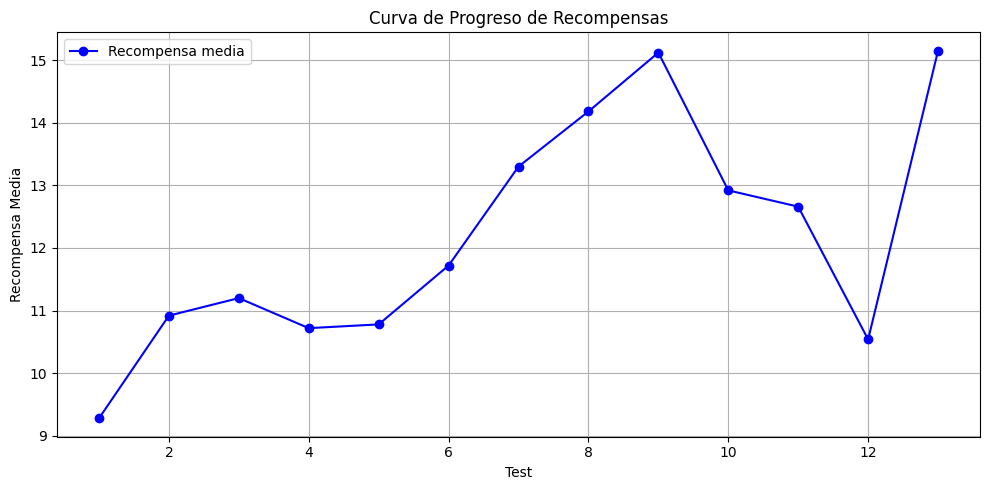

In [14]:
import matplotlib.pyplot as plt


recompensas = df["Media"]
tests = list(range(1, len(recompensas) + 1))

plt.figure(figsize=(10, 5))
plt.plot(tests, recompensas, marker='o', linestyle='-', color='blue', label='Recompensa media')


plt.title('Curva de Progreso de Recompensas')
plt.xlabel('Test')
plt.ylabel('Recompensa Media')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


El análisis de los resultados revela un aprendizaje sostenido hasta aproximadamente el Test 9, seguido por una leve caída de rendimiento en los tramos posteriores, para finalizar con un nuevo repunte alentador. Aunque no se alcanzaron los 20 puntos de recompensa media con esta estrategia, la tendencia general sugiere que un entrenamiento más prolongado probablemente habría acercado —o incluso alcanzado— ese objetivo.

Para reforzar esta hipótesis, resulta útil acudir a una métrica clave en el contexto del aprendizaje por refuerzo: el mean_q. Esta medida, que no está reflejada en la tabla anterior pero sí extraída y analizada desde registros complementarios, ofrece una visión más profunda del proceso de aprendizaje. Un valor de mean_q alto y estable a lo largo del tiempo indica que el agente está desarrollando una policy consistente y eficaz, y que las recompensas obtenidas no se deben únicamente al azar o a efectos derivados de la exploración.

Para poder extraer la información de los logs definimos la siguiente función.

In [27]:
import pandas as pd
import re

def parse_strict_log(file_path):
    pattern = re.compile(
        r"(?P<step>\d+)/\d+: episode: (?P<episode>\d+), duration: (?P<duration>\d+\.\d+)s, "
        r"episode steps: (?P<episode_steps>\d+), steps per second:\s+(?P<steps_per_sec>\d+), "
        r"episode reward: (?P<episode_reward>\d+\.\d+), mean reward:\s+(?P<mean_reward>\d+\.\d+) \[.*?\], "
        r"mean action: (?P<mean_action>\d+\.\d+) \[.*?\],  "
        r"loss: (?P<loss>\d+\.\d+), mae: (?P<mae>\d+\.\d+), mean_q: (?P<mean_q>\d+\.\d+), mean_eps: (?P<mean_eps>\d+\.\d+)"
    )

    data = []

    with open(file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            entry = {k: float(v) for k, v in match.groupdict().items()}
            data.append(entry)

    df = pd.DataFrame(data)
    return df


Y obtenemos el siguiente dataframe:

In [26]:
parse_training_log("C:\MASTER_IA\Trabajo_RF\Test06.txt")

,step,episode,duration,episode_steps,steps_per_sec,episode_reward,mean_reward,mean_action,loss,mae,mean_q,mean_eps
0,420.0,1.0,3.360,420.0,125.0,6.0,0.014,2.479,NaN,NaN,NaN,NaN
1,1131.0,2.0,5.394,711.0,132.0,7.0,0.010,2.414,NaN,NaN,NaN,NaN
2,1941.0,3.0,7.239,810.0,112.0,10.0,0.012,2.410,NaN,NaN,NaN,NaN
3,2831.0,4.0,6.752,890.0,132.0,12.0,0.013,2.394,NaN,NaN,NaN,NaN
4,3206.0,5.0,2.749,375.0,136.0,6.0,0.016,2.565,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
357,246584.0,358.0,34.623,609.0,18.0,9.0,0.015,2.440,0.011672,1.341628,1.661183,0.778350
358,247318.0,359.0,41.098,734.0,18.0,13.0,0.018,2.609,0.010552,1.333787,1.651295,0.777745
359,247953.0,360.0,35.962,635.0,18.0,10.0,0.016,2.501,0.012401,1.337557,1.653295,0.777128
360,248799.0,361.0,46.905,846.0,18.0,13.0,0.015,2.404,0.010560,1.322794,1.636269,0.776462


Recogemos los ficheros de logs almacenados y agregamos sus mean_q en una lista para poder visualizarlo:

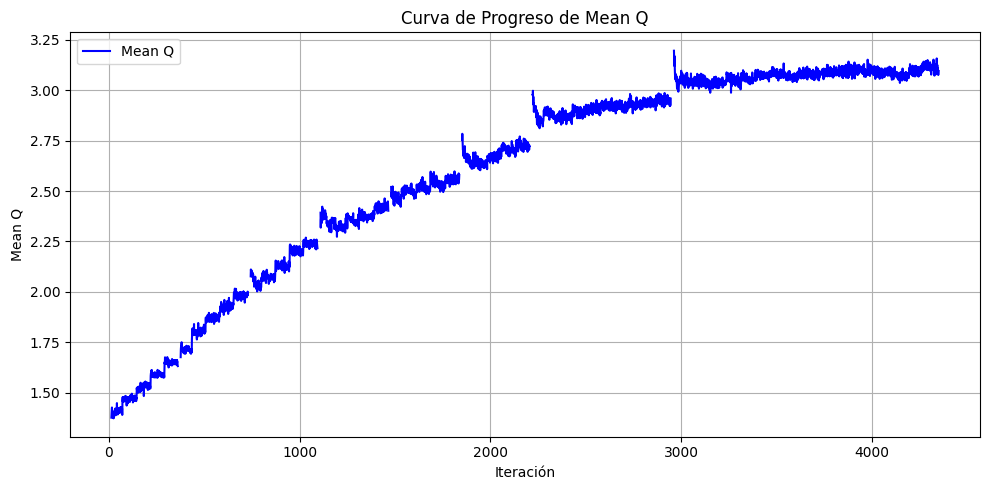

In [34]:
mean_q = []
for i in range(6, 14):
    df = parse_training_log(f"C:\MASTER_IA\Trabajo_RF\Test{i}.txt")
    mean_q += list(df["mean_q"])
    
tests = list(range(1, len(mean_q) + 1))

plt.figure(figsize=(10, 5))
plt.plot(tests, mean_q, linestyle='-', color='blue', label='Mean Q')


plt.title('Curva de Progreso de Mean Q')
plt.xlabel('Iteración')
plt.ylabel('Mean Q')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


Esta vez, nuestra intuición ha resultado acertada: el agente ha logrado aprender de forma constante y progresiva a lo largo del entrenamiento. La curva de rendimiento evidencia una mejora sostenida, reflejo de una correcta sintonía entre la exploración y la explotación. Sin embargo, es evidente que en las últimas etapas del proceso el aprendizaje ha comenzado a saturarse. Este estancamiento se manifiesta con claridad en la evolución de la métrica mean_q, cuya curva se ha aplanado casi por completo.

Este comportamiento sugiere que el modelo ha agotado en buena medida el conocimiento que puede extraer del entorno bajo la estrategia actual y el conjunto de hiperparámetros definidos. Es decir, si bien el entrenamiento ha sido exitoso, el comportamiento del mean_q en las últimas fases funciona como una señal de alerta: el modelo está dejando de aprender activamente. A partir de este diagnóstico, podrían plantearse entrenamientos complementarios o ajustes experimentales orientados a superar este techo de rendimiento. No obstante, todavía queda por analizar el comportamiento del proceso que lanzamos en paralelo a este. Veamos.

#### Versión definitiva

Nos disponemos a comentar el desarrollo y resultados de la versión final del agente. En esta sección, no solo examinaremos su rendimiento cuantitativo, sino que también mostraremos visualizaciones del agente jugando partidas completas con el modelo entrenado. Como ya adelantamos anteriormente, esta estrategia se ha basado en ejecutar un entrenamiento prolongado —más de 24 horas ininterrumpidas.

In [33]:
def build_model(window_length, input_shape, nb_actions):
    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(window_length,) + input_shape))  # (window, 84, 84) → (84, 84, window)
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), activation='relu'))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(128, (3, 3), strides=(1, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model

Pese a haber probado arquitecturas más profundas y complejas durante fases previas, llegamos a la conclusión de que un mayor número de parámetros no implicaba necesariamente un mejor rendimiento en nuestro entorno. Por ello, apostamos por una arquitectura moderadamente simple, buscando robustez y generalización más que sofisticación. Esta red cuenta con 918,630 parámetros, lo que permite entrenarla de forma eficiente en hardware convencional, sin comprometer su capacidad de aprendizaje.

Optamos así por mantener la red simple y escalar el volumen de entrenamiento, confiando en que la experiencia acumulada por el agente (más de dos millones de frames) bastaría para consolidar políticas efectivas.

In [34]:
# Preparamos memoria y política
memory = SequentialMemory(limit=1_000_000, window_length=WINDOW_LENGTH)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1.0,
                              value_min=0.1,
                              value_test=0.05,
                              nb_steps=2_000_000) 

# Creamos el modelo
model = build_model(WINDOW_LENGTH, INPUT_SHAPE, nb_actions)
print(model.summary())

# Creamos el procesador
processor = AtariProcessor()

#Creamos el agente
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=50_000,
               gamma=GAMMA,
               train_interval=TRAIN_INTERVAL,
               target_model_update=10_000,
               delta_clip=DELTA_CLIP,
               enable_dueling_network=True, 
               dueling_type='avg')

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_3 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_10 (Dense)             (None, 6)                

A continuación, comentamos las decisiones clave en la configuración del agente. Por un lado, limit=1_000_000: se aumentó significativamente la capacidad de la memoria de repetición para permitir un historial de experiencias amplio y variado, el cual comenzó en 10000. El objetivo era tratar de mejorar la estabilidad del entrenamiento y reducir la varianza en las actualizaciones de Q-valores.

Probablemente uno de lo más importantes, nb_steps_warmup=50_000. Es decir, se extendió la fase de warm-up, durante la cual el agente actúa aleatoriamente. Esto le otorga una base de datos inicial rica antes de que comience a actualizar la red neuronal, y es un aspecto cuyo efecto hemos visto constantemente durante todo el desarrollo. El agente necesita probar aleatoriamente muchas cosas antes de siquiera ponerse a tratar de aprender.

Otro, train_interval=4: se entrena la red cada 4 pasos. Esta técnica amortigua el impacto de correlaciones entre pasos consecutivos, y las veces que lo hemos definido por debajo de 4 hemos obtenido peores resultados.

Otro método de estabilización: target_model_update=10_000. La red objetivo se actualiza cada 10.000 pasos. 
Finalmente, enable_dueling_network=True, lo cual constituye uno de nuestros mejores intentos previos.

Esto es, se ha diseñado un agente con un modelo relativamente liviano, pero con acceso a una experiencia de entrenamiento extensa y variada. Esta estrategia ha demostrado ser efectiva en nuestras pruebas, alcanzando un rendimiento sólido y estable que comentaremos en detalle en las próximas secciones, acompañado de visualizaciones empíricas del agente en acción.

Al igual que en el caso anterior, procesamos el fichero de logs y obtenemos el dataframe con los datos del entrenamiento definitivo.

In [37]:

def parse_intervals_log(file_path):
    pattern = re.compile(
        r"Interval\s+(?P<interval>\d+)\s+\((?P<steps>\d+)\s+steps performed\)\s*\n"
        r".*?- reward:\s+(?P<reward>[\d.]+)\s*\n"
        r"(?P<episodes>\d+)\s+episodes\s+- episode_reward:\s+(?P<ep_reward_mean>[\d.]+)\s+\[(?P<ep_reward_min>[\d.]+),\s+(?P<ep_reward_max>[\d.]+)\]\s+- "
        r"loss:\s+(?P<loss>[\d.]+)\s+- mae:\s+(?P<mae>[\d.]+)\s+- mean_q:\s+(?P<mean_q>[\d.]+)\s+- mean_eps:\s+(?P<mean_eps>[\d.]+)\s+- ale\.lives:\s+(?P<ale_lives>[\d.]+)"
    )

    results = []

    with open(file_path, 'r') as f:
        text = f.read()

    for match in pattern.finditer(text):
        metrics = match.groupdict()
        for key, value in metrics.items():
            metrics[key] = float(value) if '.' in value else int(value)
        results.append(metrics)

    return pd.DataFrame(results)


In [42]:
df = parse_intervals_log("C:\MASTER_IA\Trabajo_RF\Definitivo.txt")
display(df)

,interval,steps,reward,episodes,ep_reward_mean,ep_reward_min,ep_reward_max,loss,mae,mean_q,mean_eps,ale_lives
0,6,50000,0.0143,16,8.875,3.0,21.0,0.007,0.032,0.040,0.975,2.169
1,7,60000,0.0137,14,9.571,4.0,16.0,0.007,0.051,0.063,0.971,2.014
2,8,70000,0.0133,12,11.417,2.0,22.0,0.007,0.067,0.084,0.966,2.088
3,9,80000,0.0145,13,10.846,5.0,19.0,0.007,0.088,0.112,0.962,2.094
4,10,90000,0.0133,13,10.308,4.0,26.0,0.006,0.114,0.143,0.957,2.170
...,...,...,...,...,...,...,...,...,...,...,...,...
171,177,1760000,0.0195,11,18.182,10.0,32.0,0.018,2.924,3.513,0.206,2.110
172,178,1770000,0.0194,11,17.455,6.0,28.0,0.017,2.915,3.501,0.201,2.081
173,179,1780000,0.0203,11,19.091,9.0,34.0,0.018,2.914,3.501,0.197,2.026
174,180,1790000,0.0179,11,14.727,8.0,28.0,0.018,2.907,3.491,0.192,2.043


Visualicemos todas las métricas, normalizadas para poder verlas en un solo gráfico.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_metrics(metrics, df):
    df_plot = df[metrics].copy()
    x = df.index

    plt.figure(figsize=(12, 6))
    for col in metrics:
        plt.plot(x, df[col], label=col)

    plt.title("Evolución de métricas durante entrenamiento")
    plt.xlabel("Intervalo")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


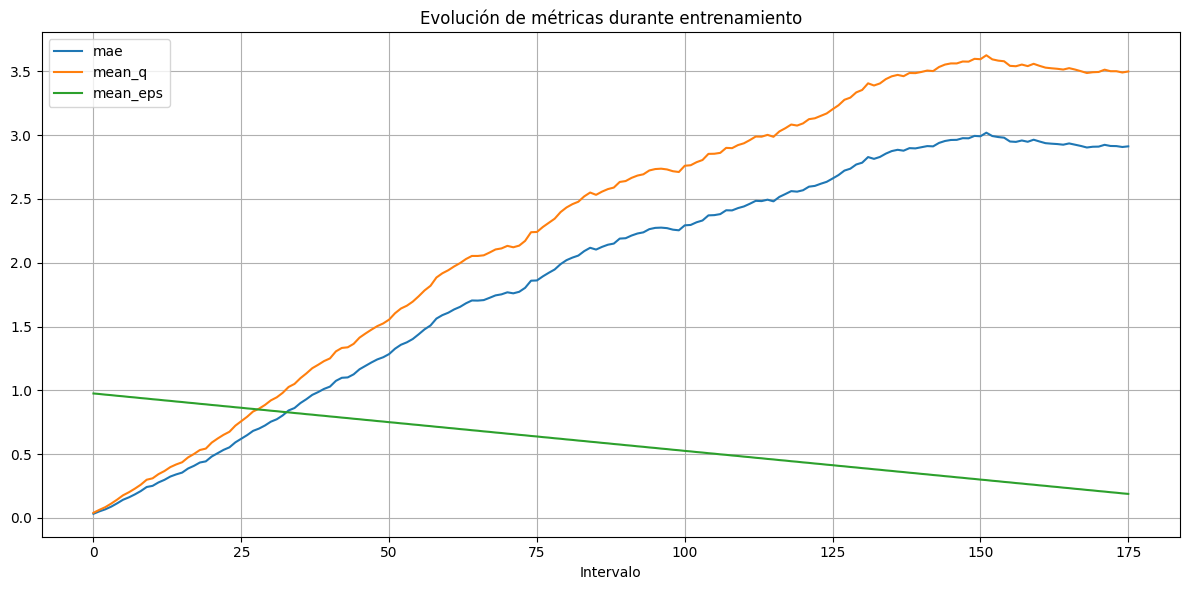

In [65]:
plot_metrics(['mae', 'mean_q', 'mean_eps'], df)

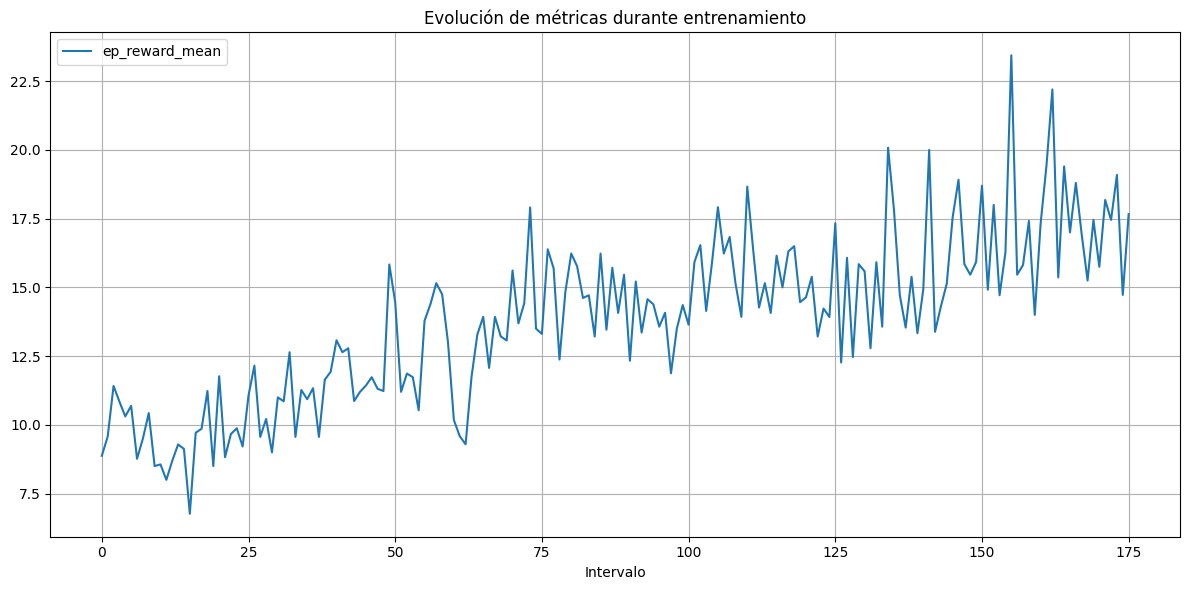

In [67]:
plot_metrics(['ep_reward_mean'], df)

La evolución del agente es clara y muy positiva. A lo largo del entrenamiento, ha demostrado una capacidad de aprendizaje progresiva, sostenida y consistente, logrando adaptarse a la dinámica del entorno. Durante las fases de validación previas, observamos que en múltiples ocasiones el agente alcanzó recompensas medias superiores a 20 puntos, lo que ya era un indicativo prometedor de su rendimiento.

Además, el valor del mean_q, que representa la estimación promedio de la función de valor de acción, ha mostrado una tendencia estable y creciente, reforzando la idea de que el agente ha aprendido una política confiable y bien fundamentada. Esta estabilidad en el mean_q sugiere que el modelo no solo ha memorizado comportamientos, sino que ha internalizado estrategias útiles y generalizables.

No obstante, para reforzar esta evidencia empírica y descartar cualquier posible sobreajuste, vamos a proceder a realizar test en tiempo real. Evaluaremos el comportamiento del agente ejecutando partidas completas con los pesos finales entrenados, con el objetivo de verificar de forma práctica que su desempeño supera el umbral de rendimiento que hemos establecido como criterio de éxito. 

---

In [40]:
#dqn.load_weights(weights_path)
# Cargas los pesos
dqn.load_weights('dqn_spaceinvaders_weights.h5f')

#Evaluación en modo test
scores = dqn.test(env, nb_episodes=10, visualize=False)
print("Media de recompensa:", np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 18.000, steps: 814
Episode 2: reward: 23.000, steps: 906
Episode 3: reward: 23.000, steps: 871
Episode 4: reward: 30.000, steps: 1291
Episode 5: reward: 26.000, steps: 1039
Episode 6: reward: 10.000, steps: 568
Episode 7: reward: 29.000, steps: 1104
Episode 8: reward: 19.000, steps: 750
Episode 9: reward: 10.000, steps: 505
Episode 10: reward: 27.000, steps: 1258
Media de recompensa: 21.5
